In [4]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten , Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2

Using TensorFlow backend.


In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [7]:
ob= ImageDataGenerator(
        rescale=1./255,
        rotation_range = 30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip = True,
        )
train_set=ob.flow_from_directory('train',
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary')


Found 5216 images belonging to 2 classes.


In [8]:
ob1=ImageDataGenerator(rescale=1./255)
valid_set=ob1.flow_from_directory('val',
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary')

Found 16 images belonging to 2 classes.


In [9]:
test_generator = ob1.flow_from_directory(
    'test',
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 624 images belonging to 2 classes.


In [10]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [12]:
print("dimensions of the images are:")
img=cv2.imread("train/NORMAL/IM-0164-0001.jpeg")
dimensions=img.shape
print(dimensions)

dimensions of the images are:
(808, 1202, 3)


In [13]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [14]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)       

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [16]:
history=model.fit(x = train_set, validation_data = valid_set, epochs = 12,callbacks = [learning_rate_reduction])

Epoch 1/12
111/163 [===================>..........] - ETA: 7:54 - loss: 0.6328 - accuracy: 0.8314

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


112/163 [===================>..........] - ETA: 8:33 - loss: 0.6309 - accuracy: 0.8312

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 119 could not be retrieved. It could be because a worker has died.
  UserWarning)


113/163 [===================>..........] - ETA: 8:39 - loss: 0.6268 - accuracy: 0.8327

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 118 could not be retrieved. It could be because a worker has died.
  UserWarning)


120/163 [=====================>........] - ETA: 7:54 - loss: 0.6081 - accuracy: 0.8349

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 54 could not be retrieved. It could be because a worker has died.
  UserWarning)


124/163 [=====================>........] - ETA: 8:11 - loss: 0.6022 - accuracy: 0.8357

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 139 could not be retrieved. It could be because a worker has died.
  UserWarning)


128/163 [======================>.......] - ETA: 7:38 - loss: 0.5966 - accuracy: 0.8354

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


129/163 [======================>.......] - ETA: 7:33 - loss: 0.5958 - accuracy: 0.8353

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 123 could not be retrieved. It could be because a worker has died.
  UserWarning)


130/163 [======================>.......] - ETA: 7:28 - loss: 0.5933 - accuracy: 0.8361

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


133/163 [=======================>......] - ETA: 7:01 - loss: 0.5855 - accuracy: 0.8372

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 111 could not be retrieved. It could be because a worker has died.
  UserWarning)


135/163 [=======================>......] - ETA: 6:39 - loss: 0.5796 - accuracy: 0.8389

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 90 could not be retrieved. It could be because a worker has died.
  UserWarning)


136/163 [========================>.....] - ETA: 6:35 - loss: 0.5781 - accuracy: 0.8389

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 104 could not be retrieved. It could be because a worker has died.
  UserWarning)


163/163 [==============================] - 2455s 15s/step - loss: 0.5291 - accuracy: 0.8484 - val_loss: 56.8353 - val_accuracy: 0.5000
Epoch 2/12
141/163 [========================>.....] - ETA: 2:38 - loss: 0.2981 - accuracy: 0.8828

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 129 could not be retrieved. It could be because a worker has died.
  UserWarning)


142/163 [=========================>....] - ETA: 2:39 - loss: 0.2964 - accuracy: 0.8836

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


152/163 [==========================>...] - ETA: 1:34 - loss: 0.2934 - accuracy: 0.8851

C:\Users\Public\Anaconda3\envs\tensor\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


163/163 [==============================] - 1505s 9s/step - loss: 0.2860 - accuracy: 0.8873 - val_loss: 31.5047 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 1044s 6s/step - loss: 0.2365 - accuracy: 0.9153 - val_loss: 58.4987 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
163/163 [==============================] - 1036s 6s/step - loss: 0.1485 - accuracy: 0.9448 - val_loss: 0.5817 - val_accuracy: 0.6250
Epoch 5/12
163/163 [==============================] - 1064s 7s/step - loss: 0.1346 - accuracy: 0.9565 - val_loss: 40.5273 - val_accuracy: 0.5000
Epoch 6/12
163/163 [==============================] - 1232s 8s/step - loss: 0.1186 - accuracy: 0.9601 - val_loss: 56.4267 - val_accuracy: 0.5000

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 7/12
163/163 [==============================] - 1171s 7s/step - loss: 0.1155 - accuracy: 0.9615 - val_loss: 1.3199 - va

In [18]:
import numpy as np
y_pred=model.predict(test_generator)
y_pred= np.around(y_pred)

In [19]:
print(y_pred)

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.

In [20]:
k=model.evaluate_generator(test_generator)

In [21]:
print("accuracy of the model on test data is :",k[1]*100,"%")

accuracy of the model on test data is : 90.06410241127014 %


In [22]:
print(test_generator)

In [23]:
import cv2
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('train/PNEUMONIA/person1004_virus_1686.jpeg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image=test_image/255.0
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result=np.round(result)
if result[0][0]==0.0:
    print("NORMAL")
elif result[0][0]==1.0:
    print("PNEUMONIA")
else:
    pass

PNEUMONIA


In [36]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_pneumonia.h5')

In [25]:
import joblib
joblib.dump(model,'pneumonia.jbl')

['pneumonia.jbl']

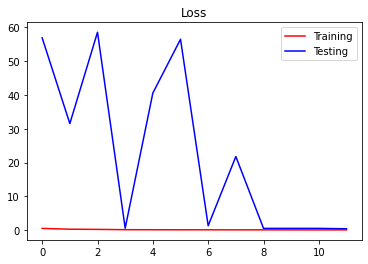

In [26]:
plt.title('Loss')
plt.plot(history.history['loss'],'r',label='Training')
plt.plot(history.history['val_loss'],'b',label='Testing')
plt.legend()
plt.show()

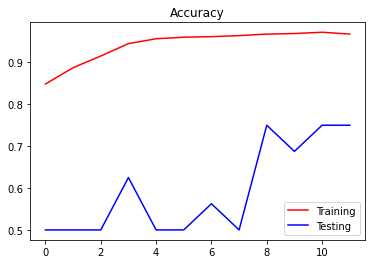

In [27]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r',label='Training')
plt.plot(history.history['val_accuracy'],'b',label='Testing')
plt.legend()
plt.show()

In [28]:
print(len(model.layers))

22


In [29]:
for i in range(len(model.layers)):
    layer=model.layers[i]
    #check for convolutional layer
    if 'conv' not in layer.name:
        continue
    #summarize output shape
    print(i,layer.name,layer.output.shape)

0 conv2d_1 (None, 150, 150, 32)
3 conv2d_2 (None, 75, 75, 64)
7 conv2d_3 (None, 38, 38, 64)
10 conv2d_4 (None, 19, 19, 128)
14 conv2d_5 (None, 10, 10, 256)


In [31]:
#visualising feature maps of first convolutional layer...We can do same for remaining 4 too
from keras.models import Model
#redefine  model to output right after the first hidden layers
model1=Model(inputs=model.inputs,outputs=model.layers[0].output)
#load the image with the required shape
img=image.load_img('test/NORMAL/IM-0001-0001.jpeg',target_size=(150,150))
#converting image to img_array
img=image.img_to_array(img)
img=img/255.
#expand dimensions so that it represent a single 'sample'
img=np.expand_dims(img,axis=0)
feature_maps=model1.predict(img)

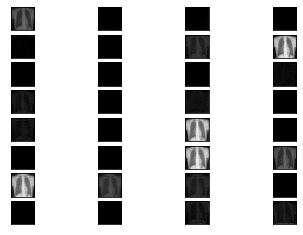

In [32]:
#since the output of 1st hidden layer is 150*150*32.
# plot all 32 maps in an 8x4 
s1 = 8
s2=4
ix = 1
for _ in range(s1):
    for _ in range(s2):
        # specify subplot and turn of axis
        ax = plt.subplot(s1, s2, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [33]:
# summarize filter shapes
for i in range(len(model.layers)):
    layer=model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights this are nothing but filter values
    filters, biases = layer.get_weights()
    print(i,layer.name, filters.shape)

0 conv2d_1 (3, 3, 3, 32)
3 conv2d_2 (3, 3, 32, 64)
7 conv2d_3 (3, 3, 64, 64)
10 conv2d_4 (3, 3, 64, 128)
14 conv2d_5 (3, 3, 128, 256)


In [34]:
#visualising  filters of 1st convolutional layers
filters, biases = model.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them easily because we have some negative values too
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

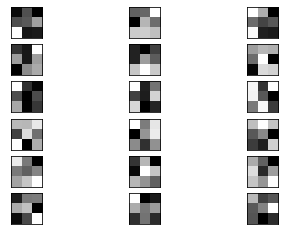

In [35]:
#since the trained images are 3d or contains RGB channels so each filter further divided to 3...So, we here plot out of 32 filters in first layer we look at first 6 of them
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [37]:
from keras.models import load_model
model1=load_model('model_pneumonia.h5')

In [38]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)       

In [39]:
print(model1.evaluate_generator(test_generator)[1]*100)

90.06410241127014
